In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from scipy import stats as sts
from matplotlib import pyplot as plt
import numpy as np
from src.bootstrap.bootstrap import normal_ci, pivot_ci, percentile_ci, bootstrap
from src.statistics.skew import sample_skewness

Sample skewness: 	 1.9319425716195726
Bootstrap variance: 	 0.17931817358764904
Bootstrap se: 		 0.42345976619703674
95% normal CI: 		 (1.101976680971629, 2.7619084622675163)
95% pivot CI: 		 (0.988781742792439, 2.6478314387569357)
95% percentile CI: 	 (1.2160537044822095, 2.875103400446706)


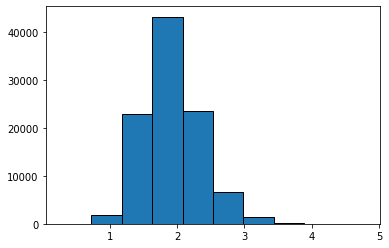

In [16]:
"""
Chapter 8 -- Exercise 2 

Conduct a simulation to compare the various bootstrap confidence interval methods.
Let n = 50 and let T(F) = \int (x - \mu)^3 / \sigma^3 dF(x) be the skewness.

Draw Y_1, Y_2, ..., Y_n ~ N(0,1)
Set X_i = e^{Y_i}, i = 1, 2, ..., n

Construct the three types of bootstrap 95% confidence intervals for T(F) from the data
X_1, X_2, ... X_n. Repeat this thing many times and estimate th true coverage of the three
intervals

:param n: Number of data points drawn from N(0,1)
:return:
"""

n = 50 

y = sts.norm.rvs(size=n)
x = np.exp(y)

theta_ht = sample_skewness(x)
v_boot, se_boot, t_boot = bootstrap(sample_skewness, x, b=100000)

n_ci = normal_ci(theta_ht, se_boot, alpha=.05)
p_ci = pivot_ci(theta_ht, t_boot, alpha=.05)
pt_ci = percentile_ci(t_boot, alpha=.05)

print(f"Sample skewness: \t {theta_ht}")
print(f"Bootstrap variance: \t {v_boot}")
print(f"Bootstrap se: \t\t {se_boot}")
print(f"95% normal CI: \t\t {n_ci}")
print(f"95% pivot CI: \t\t {p_ci}")
print(f"95% percentile CI: \t {pt_ci}")

plt.hist(t_boot, ec="black")
plt.show()

In [4]:
def quantile_stat(x):
    return (np.quantile(x, q=.75) - np.quantile(x, q=.25)) / 1.34

Sample quantile diff: 	 1.1652377014217103
True quantile diff: 	 1.1416303404192403
Bootstrap variance: 	 0.002106905570539277
Bootstrap se: 		 0.045901041061606404
95% normal CI: 		 (1.0752733140880677, 1.255202088755353)
95% pivot CI: 		 (1.0651389788402836, 1.2477835050611885)
95% percentile CI: 	 (1.0826918977822322, 1.265336424003137)


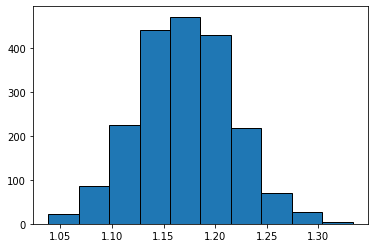

In [5]:
"""
Chapter 8 -- Exercise 3 

Let X_1, X_2, ..., X_n ~ t_3
n = 25
Let \theta = T(F) = (q_{.75} - q_{.25})/1.34, where q_p denotes the pth quantile. 

Do a simulation to compare the coverage and length of the following confidence intervals
for \theta:

(i) Normal interval with standard error from bootstrap 
(ii) Bootstrap percentile interval
(iii) Pivotal bootstrap interval 

"""

n = 1000
x = sts.t.rvs(3, size=n)
theta_ht = quantile_stat(x)
v_boot, se_boot, t_boot = bootstrap(quantile_stat, x, b=2000)

n_ci = normal_ci(theta_ht, se_boot, alpha=.05)
p_ci = pivot_ci(theta_ht, t_boot, alpha=.05)
pt_ci = percentile_ci(t_boot, alpha=.05)

print(f"Sample quantile diff: \t {theta_ht}")
print(f"True quantile diff: \t {(sts.t.ppf(.75, df=3) - sts.t.ppf(.25, df=3))/1.34}")
print(f"Bootstrap variance: \t {v_boot}")
print(f"Bootstrap se: \t\t {se_boot}")
print(f"95% normal CI: \t\t {n_ci}")
print(f"95% pivot CI: \t\t {p_ci}")
print(f"95% percentile CI: \t {pt_ci}")

plt.hist(t_boot, ec="black")
plt.show()


Sample theta: 		 139.1696849956227
Bootstrap variance: 	 18.310187188266475
Bootstrap se: 		 4.279040451814691
95% normal CI: 		 (130.7829198216759, 147.5564501695695)
95% pivot CI: 		 (130.45331597308788, 147.2798488687681)
95% percentile CI: 	 (131.0595211224773, 147.88605401815752)


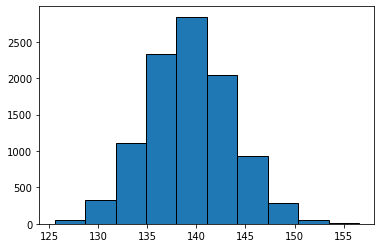

In [15]:
"""
Chapter 8 -- Exercise 6

Let:
    X_1, X_2, ..., X_n ~ Normal(mu, 1)
    theta = e^mu 
    theta_ht = e^{X_bar}

Create a dataset (using mu = 5) consisting of n = 100 observations

(a) Use the bootstrap to get the se and 95% confidence interval for theta 
"""

st = lambda x: np.exp(x.mean())

mu = 5
n = 1000
x = sts.norm.rvs(loc=mu, size=(n,))

theta_ht = np.exp(x.mean())
v_boot, se_boot, t_boot = bootstrap(st, x, b=9999)

n_ci = normal_ci(theta_ht, se_boot, alpha=.05)
p_ci = pivot_ci(theta_ht, t_boot, alpha=.05)
pt_ci = percentile_ci(t_boot, alpha=.05)

print(f"Sample theta: \t\t {theta_ht}")
print(f"Bootstrap variance: \t {v_boot}")
print(f"Bootstrap se: \t\t {se_boot}")
print(f"95% normal CI: \t\t {n_ci}")
print(f"95% pivot CI: \t\t {p_ci}")
print(f"95% percentile CI: \t {pt_ci}")

plt.hist(t_boot, ec="black")
plt.show()